<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico: TS1
#### Joaquin Gomez Lucero



# Introducción
En este trabajo se aborda  la Sintesis de señales. 

Se sintetizaron y graficaron señales con una cantidad fija de muestras $N = 500$ y una frecuencia de muestreo $fs=40kHz$. Estos parámetros garantizan una correcta visualización y permiten relacionar la cantidad de muestras con la resolución temporal y frecuencial de la señal.
Se trabajó principalmente con una señal sinusoidal de frecuencia $f = 2kHz$ como lo solicita la consigna. A partir de ella, se obtuvieron versiones amplificadas, desfasadas y moduladas en amplitud, así como señales cuadradas y pulsos rectangulares.

En el marco teorico, se relacionaron los parametros: Cantidad de muestras $N$ , Frecuencia de muestreo $fs$ , Periodo de muestreo $Ts = 1/fs$ y la resolucion de frecuencia $Δf = fs/N$. 
Se verifico la ortogonalidad entre señales aplicando el concepto visto anteriormente de producto interno y se analizaron las funciones de autocorrelacion y correlacion cruzada.

Finalemente se demostro una identidad trigonometrica clasica, se comprobo que utilizando señales sinusoideales y para cualquier frecuencia f se cumple.
Como actividad bonus, se proceso la señal y la energia de un archivo de audio en formato .wav. 

# Análisis y desarrollo

 			 ###### Ejercicio 1 ######


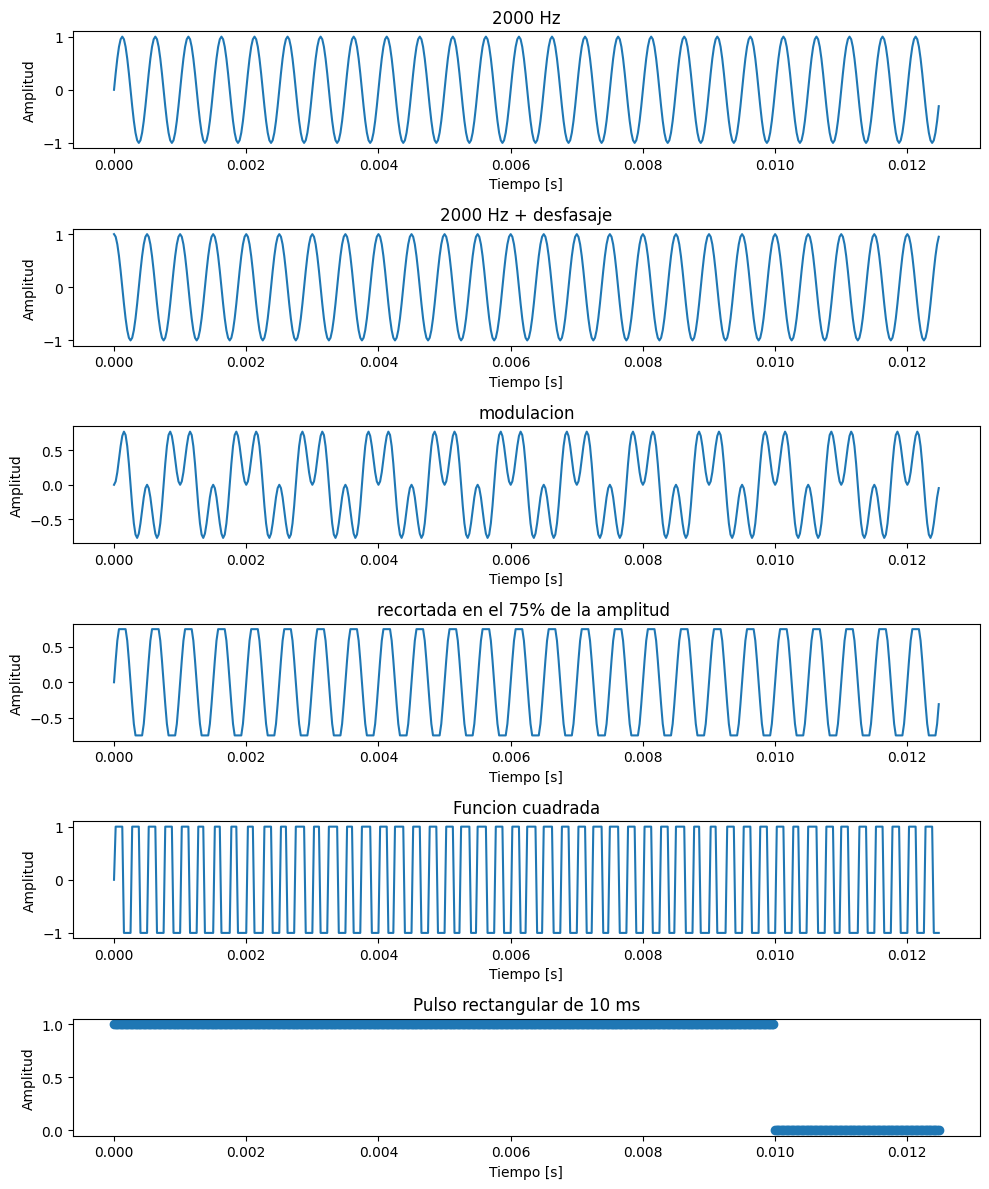

Señal principal, Ts:  2.5e-05  ,N:  500 y potencia promedio: 0.5
Señal desfada, Ts:  2.5e-05  ,N:  500 y potencia promedio: 0.4999999999999999
Señal modulada, Ts:  2.5e-05  ,N:  500 y potencia promedio: 0.25000000000000006
Señal recortada, Ts:  2.5e-05  ,N:  500 y potencia promedio: 0.3694466011250105
Señal cuadrada, Ts:  2.5e-05  ,N:  500 y potencia promedio: 0.998
Señal pulso, Ts:  2.5e-05  ,N:  500 y energia: 400.0


 			 ###### Ejercicio 2 ######
señal principal vs x1 (desfasada pi/2): 2.523314890368056e-15
señal principal vs x2 (modulada): 0.03841498399221329
señal principal vs x3 (clipeada en amplitud): 0.9939811729034701
señal principal vs x4 (cuadrada de 4kHz): -0.016987558809570445
señal principal vs pulso: 2.162673416643248e-16


 			 ###### Ejercicio 3 - autocorrelacion ######


<Figure size 640x480 with 0 Axes>

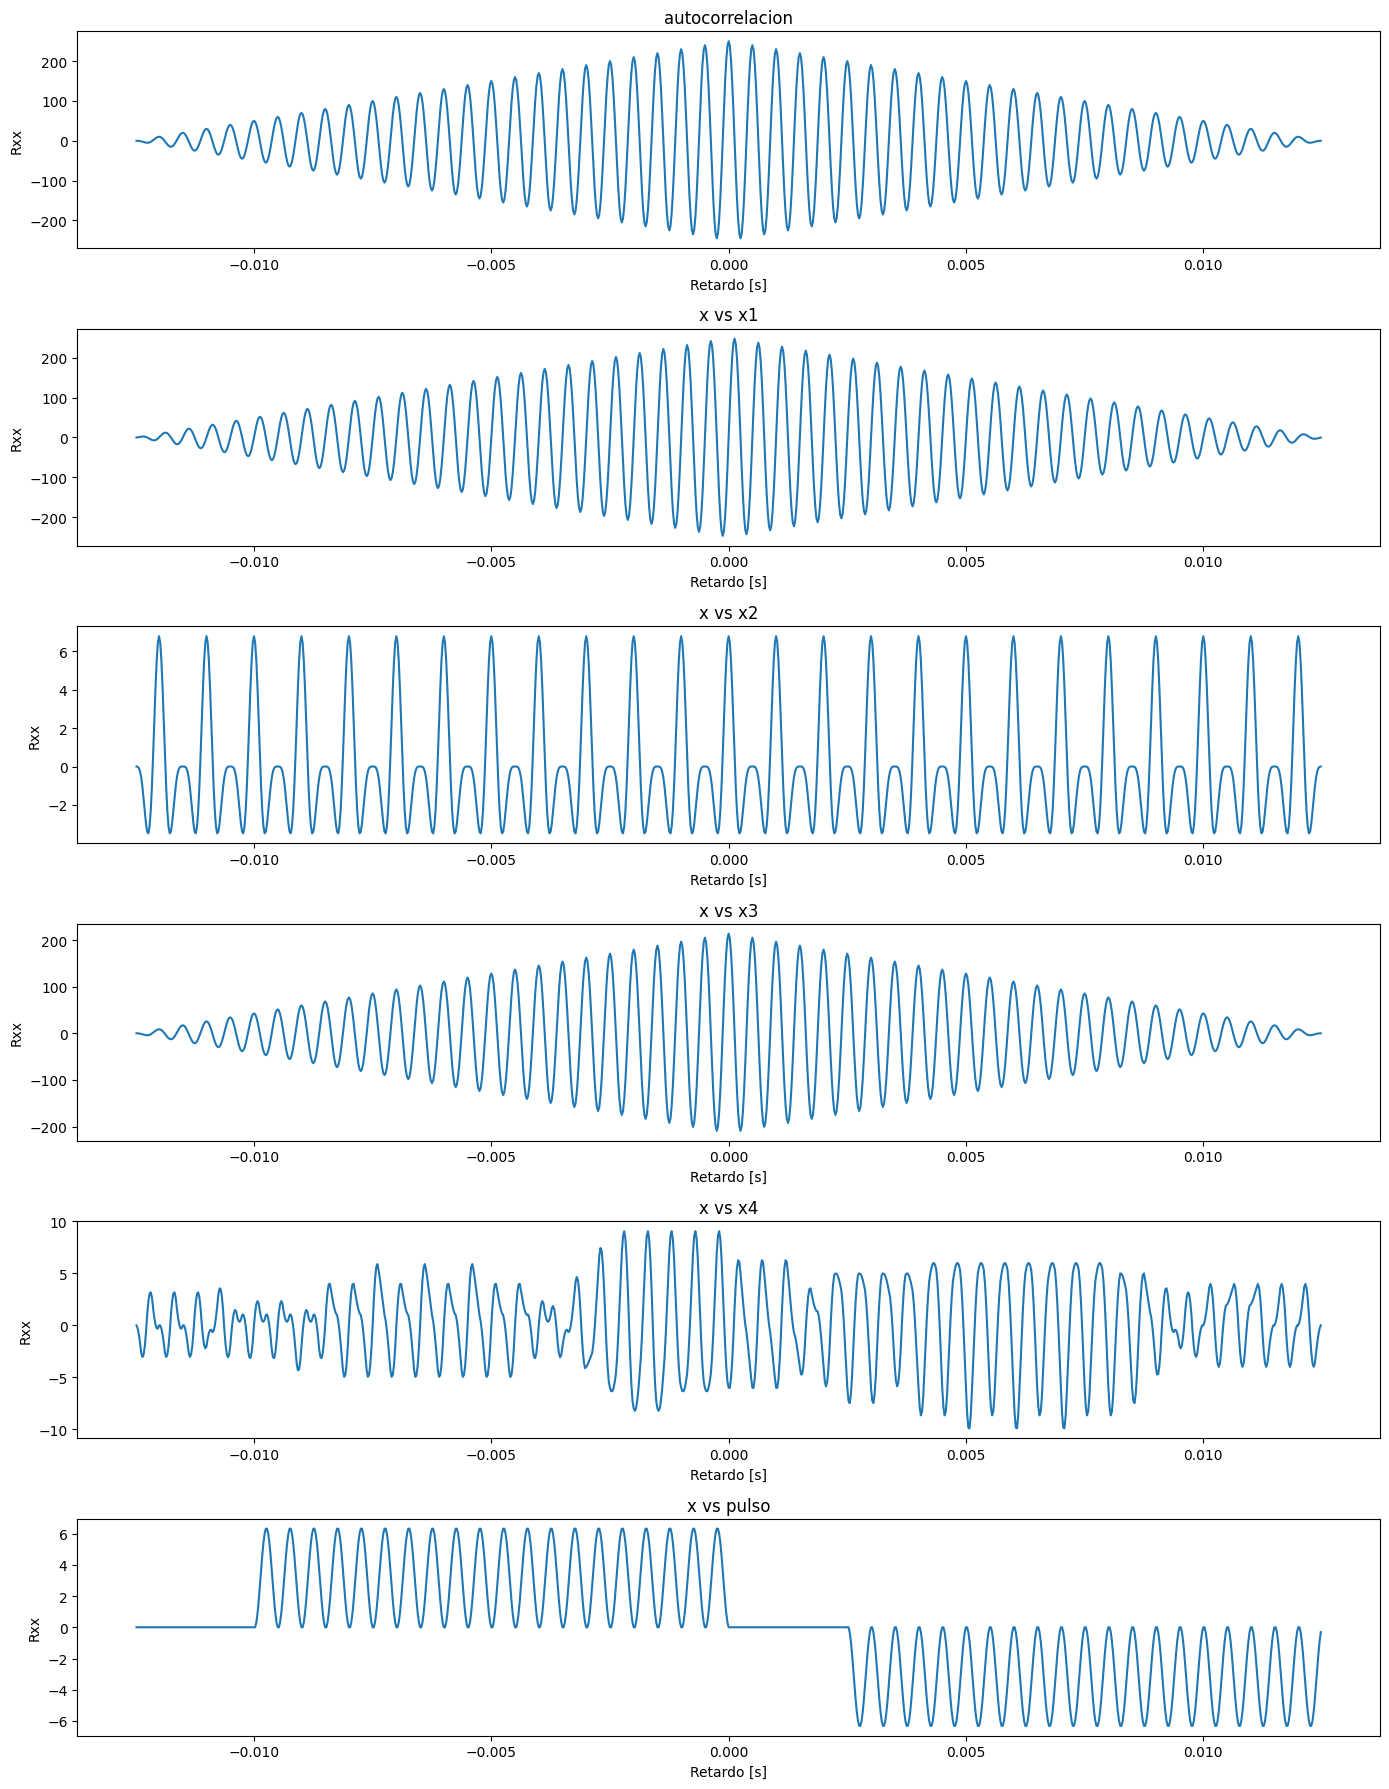

 			 ###### Ejercicio 3  - igualdad ######
La propiedad se cumple para cualquier frecuencia
La igualdad para cualquier f da: -9.969802761133906e-14
Se pude ver que es un numero muy cercano a 0 y la propiedad se cumple


 			 ###### Ejercicio 4 ######
Energía del sonido: 272.10394
La fs que me devuelve es: 48000


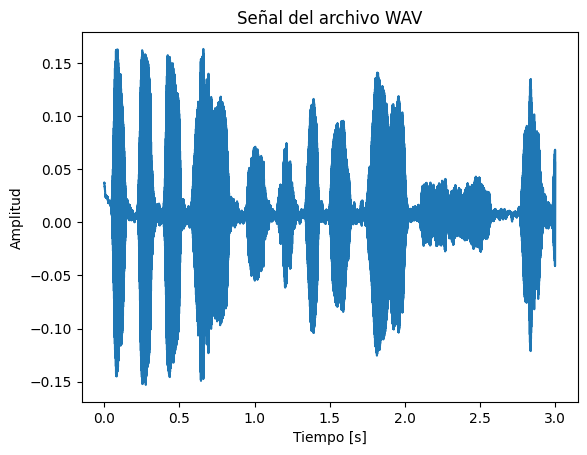

In [9]:
"""
Created on Wed Aug 20 14:36:27 2025

@author: JGL
"""
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy import signal
from scipy.io import wavfile

# Una señal sinusoidal de 2KHz.
# Misma señal amplificada y desfazada en π/2.
# Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
# Señal anterior recortada al 75% de su amplitud.
# Una señal cuadrada de 4kHz.
# Un pulso rectangular de 10ms.
# En cada caso indique tiempo entre muestras, número de muestras y potencia.
print(" \t\t\t ###### Ejercicio 1 ######")

fs = 40000
N = 500
f = 2000

deltaF = fs/N
Ts = 1/fs
def mi_funcion_sen(vmax, dc, f, fase, N, fs):
    Ts = 1/fs
    tt = np.arange(N) * Ts           # vector de tiempo
    xx = dc + vmax * np.sin(2* np.pi * f * tt + fase)  # señal senoidal
    return tt, xx

#Para hacer modulacion hay que multplicar una señal contra otra señal.
def modulacion(vmax, dc, f, fase, N, fs):
    tt, xx = mi_funcion_sen(vmax=1, dc=0, f=f, fase=0, N = N, fs=fs)
    tt, x1 = mi_funcion_sen(vmax=1, dc=0, f=f/2, fase=0, N = N, fs=fs)
    x2 = xx * x1
    return x2


tt, xx = mi_funcion_sen(vmax=1, dc=0, f=f, fase=0, N = N, fs=fs)
tt, x1 = mi_funcion_sen(vmax=1, dc=0, f=f, fase=np.pi/2, N = N, fs=fs)
x2 = modulacion(vmax=1, dc=0, f=f, fase=0, N = N, fs=fs)

#Forma de hacer el clipeo para recortar la amplitud de la señal. 
x3 = np.clip(xx,-0.75,0.75,out=None)

#x4 = sp.square(2 * np.pi * 2*f * tt) #multiplico f por dos porque me pide 4kHz. Esta es con la funcion de scipy
x4 = np.sign(np.sin(2 * np.pi * 2*f * tt)) ##esta es haciendolo con numpy y viendo el signo de la senoidal

# aca hago el del puslo. Como Npulso = Tpulso . fs. Voy a tener 200 muestras
# como mi N lo tengo fijo en 500. voy a tener 300 muestras que estan en 0. Si yo aumento N por ejemplo, siempre voy a tener fijas 200muestras que valen 1 y las N-200=0.
#Si yo cambio fs, me cambia el Npulso entonces ahi ya se modifican las muestras que valen 1. 
T_pulso = 0.01    # 10 ms
N_pulso = int(T_pulso * fs)

pulso = np.zeros(N)
pulso[:N_pulso] = 1  # primeras 200 muestras valen 1

## aca empiezan los graficos.
plt.figure(figsize=(10,12))

plt.figure(1)
plt.subplot(6,1,1)
plt.plot(tt, xx)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("2000 Hz")

plt.subplot(6,1,2)
plt.plot(tt, x1)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("2000 Hz + desfasaje")

plt.subplot(6,1,3)
plt.plot(tt, x2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("modulacion")

plt.subplot(6,1,4)
plt.plot(tt, x3)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("recortada en el 75% de la amplitud ")

#plt.tight_layout()  # ajusta los títulos y ejes
#plt.show()


#plt.figure(2)
plt.subplot(6,1,5)
plt.plot(tt, x4)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Funcion cuadrada")

plt.subplot(6,1,6)
plt.scatter(tt, pulso)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Pulso rectangular de 10 ms")

plt.tight_layout()  # ajusta los títulos y ejes
plt.show()

## np.mean(xx**2  saca el promedio de esos valores, para xx,x1,x2,x3,x4 voy a usar la potencia promeido. Porque tienen duración infinita (si la extendiera en el tiempo), y su energía sería infinita.
# np.mean hace 1/N * sumatoria desde n=1 hasta N de x**2
potencia_xx = np.mean(xx**2)
potencia_x1 = np.mean(x1**2)
potencia_x2 = np.mean(x2**2)
potencia_x3 = np.mean(x3**2)
potencia_x4 = np.mean(x4**2)
energia_pulso = np.sum(pulso**2) #aca uso energia porque, Señales no periódicas o de duración finita.
#aca imprimo esto que piden: En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.
print("Señal principal, Ts: ",Ts, " ,N: ", N, "y potencia promedio:", potencia_xx)
print("Señal desfada, Ts: ",Ts, " ,N: ", N, "y potencia promedio:", potencia_x1)
print("Señal modulada, Ts: ",Ts, " ,N: ", N, "y potencia promedio:", potencia_x2)
print("Señal recortada, Ts: ",Ts, " ,N: ", N, "y potencia promedio:", potencia_x3)
print("Señal cuadrada, Ts: ",Ts, " ,N: ", N, "y potencia promedio:", potencia_x4)
print("Señal pulso, Ts: ",Ts, " ,N: ", N, "y energia:", energia_pulso)
print("\n")



##2) ortogonalidad

def fun_ortogonalidad(x, y):
    numerador = np.sum(x*y) ##aca ya sabe que el vector tiene N elementos, entonces suma desde n=0 hasta N-1.
    denominador = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)) # aca normalizo cada señal
    return numerador/denominador

print(" \t\t\t ###### Ejercicio 2 ######")

print("señal principal vs x1 (desfasada pi/2):", fun_ortogonalidad(xx, x1))
print("señal principal vs x2 (modulada):", fun_ortogonalidad(xx, x2))
print("señal principal vs x3 (clipeada en amplitud):", fun_ortogonalidad(xx, x3))
print("señal principal vs x4 (cuadrada de 4kHz):", fun_ortogonalidad(xx, x4))
print("señal principal vs pulso:", fun_ortogonalidad(xx, pulso))
print("\n")

#3)  3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.
print(" \t\t\t ###### Ejercicio 3 - autocorrelacion ######")

Rxx = np.correlate(xx, xx, mode="full")
Rx1 = np.correlate(xx, x1, mode="full")
Rx2 = np.correlate(xx, x2, mode="full")
Rx3 = np.correlate(xx, x3, mode="full")
Rx4 = np.correlate(xx, x4, mode="full")
Rxpulso = np.correlate(xx, pulso, mode="full")

lags = np.arange(-N+1, N)         # retardos en muestras
lags_time = lags * Ts

plt.figure(2)
plt.figure(figsize=(14,18))
plt.subplot(6,1,1)
plt.plot(lags_time, Rxx)
plt.title("autocorrelacion")
plt.xlabel("Retardo [s]")
plt.ylabel("Rxx")

plt.subplot(6,1,2)
plt.plot(lags_time, Rx1)
plt.title("x vs x1")
plt.xlabel("Retardo [s]")
plt.ylabel("Rxx")


plt.subplot(6,1,3)
plt.plot(lags_time, Rx2)
plt.title("x vs x2")
plt.xlabel("Retardo [s]")
plt.ylabel("Rxx")

plt.subplot(6,1,4)
plt.plot(lags_time, Rx3)
plt.title("x vs x3")
plt.xlabel("Retardo [s]")
plt.ylabel("Rxx")

#plt.tight_layout()  # ajusta los títulos y ejes
#plt.show()

#plt.figure(4)

plt.subplot(6,1,5)
plt.plot(lags_time, Rx4)
plt.title("x vs x4")
plt.xlabel("Retardo [s]")
plt.ylabel("Rxx")

plt.subplot(6,1,6)
plt.plot(lags_time, Rxpulso)
plt.title("x vs pulso")
plt.xlabel("Retardo [s]")
plt.ylabel("Rxx")

plt.tight_layout()  # ajusta los títulos y ejes
plt.show()


#3 Igualdad
print(" \t\t\t ###### Ejercicio 3  - igualdad ######")

w = 2 * np.pi * f
igualdad = 2*np.sin(w*tt)*np.sin(w*tt/2)-np.cos(w*tt/2)+np.cos(w*tt*3/2)
if np.allclose(igualdad, 0, atol=1e-12):
    print("La propiedad se cumple para cualquier frecuencia")
    print("La igualdad para cualquier f da:", np.sum(igualdad))
    print("Se pude ver que es un numero muy cercano a 0 y la propiedad se cumple")

else:
    print("No se cumple la propiedad")
    print(igualdad)


## 4)
## 4)
print("\n")

print(" \t\t\t ###### Ejercicio 4 ######")

fs, data = wavfile.read("lacucaracha.wav")

# Calcular energía
energia_sonido = np.sum(data**2)

print("Energía del sonido:", energia_sonido)
print("La fs que me devuelve es:", fs)

# Vector de tiempo propio del wav
N_wav = len(data)
tt_wav = np.arange(N_wav) / fs ##Esto lo hago para el tiempo, Cuando divido por fs lo pongo en segundos. 


# Graficar señal del wav
plt.figure(5)
plt.plot(tt_wav, data)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal del archivo WAV")
plt.show()


# Conclusiones
Realizando una conclusion punto por punto de lo visto en los graficos y los datos mostrados en el codigo se puede decir que:

1) En el primer punto, se pudo observar de manera correcta las señales pedidas. Con los parametros que fije, en el caso de el pulso por ejemplo, se puede notar el valor cte = 1 va desde 0 hasta 10ms pero si se modifica el N = 1000 puedo ver que para t>10ms vale 0. Eso quiere decir que esta bien la señal. Se utiliza potencia promedio en señales periodicas y energia en señales finitas como el pulso. Para las muestras de potencia promedio y energia se puede ver como los valores son consistentes, ya que en el caso de la señal modulada que la potencia promedio es igual a 0,25 es porque ambas señales tienen amplitud 1 y una frecuencia es la mitad de la otra. El promedio de sen^2 de cada una es 0,5 y por ortogonalidad, el promedio del cuadradado del producto 0,5 * 0,5 = 0,25. Para la señal cuadrada es aporximadamente 1 por el muestreo finito, pero siempre una onda cuadrada ideal con amplitud 1 tiene potencia exactamente 1.  

2) En el caso de la ortogonalidad se normalizo cada señal, asi depende unicamente de la geometria de la señal y no de la amplitud o energia. Los valores mostrados tienen sentido ya que unicamente la señal recortada en amplitud es la mas similiar a la señal principial y dio aporximadamente 1 y las demas dieron numeros significativamente chicos.

3) Los graficos mostrados en la autocorrelacion y la correlacion cruzada tambien tiene sentido. Por ejemplo en el caso de la autocorrelacion se puede ver como el pico maximo esta en k = 0 que representa la energia maxima, ya que si k = 0, Rxx = np.sum(x**2) que representa la energia. Luego en la desfazada y la recortada se ve que el pico maximo en k = 0 no tiene la misma amplitud que en la señal prinicipal, asi que se comporta como esperabamos. En la correlacion con la señal pulso tambien da algo muy coherente que se puede explicar diciendo que entre 0 y 10ms cuando la senoidal principal vale 1 la correlacion tambien y cuando vale 0 la correlacion tambien. Luego lo mismo cuando salis del pulso de 10ms, si vale -1 la senoidal la correlacion vale 1 y cuando vale 0 la correlacion tambien.

4) Para la igualdad se demostro que vale para cualquier frecuencia. Se demostro en la hoja y luego se comprobo para las frecuencias en python. Se utilizo el np.allclose para poder agregarle una tolerancia muy chica ya que podria dar un numero muy cercano a 0 por el error de maquina.



# TEMPLATE

Pude resolver la tarea, pero tenia muchas dudas. En el transcurso de la realizacion me surgieron muchas dudas conceptuales que las pude resolver con lo dado en clase y con ayuda del chatgpt. Por ejemplo, en el analisis de los graficos en la autocorrelacion o la correlacion cruzada, no entendia a que se debia esa figura de romboide que se graficaba. Entonces debatiendo con el chatGpt pude entender a que se debia ese grafico. 
Ahora al finalizar todo el trabajo, ya no me quedan muchas dudas porque el tp me ayudo con los graficos y los datos que me devolvia a entender el comportamiento de los temas explicados. 

En esta tarea aprendi: A graficar señales senoidales con distintos desfasajes y amplitudes. El concepto de modulacion, pulso y señal cuadrada. Cuando una señal es ortogonal y porque. El concepto de autocorrelacion y correlacion cruzada que sirve para detectar simitudes y otras señales. Ademas aprendi a cargar un archivo de audio .wav en python y poder graficar su señal y ver la energia. Me ayudo este TS1 a trabajar con python ya que tiene muchisimas funciones a utilizar. 

Me quedo claro todo el punto 1,2 y 3. Capaz que a esa igualdad no le pude encontrar una aplicacion, pero entendi la demostracion. Pude ver que si tengo pocas muestras N, en la recortada en amplitud si mi fs es chica, voy a tener pocas muestras para un tiempo muy largo y no se va a recortar la señal porque voy a tener 1 valor y va a tener un pico (ese pico igual va a estar en el valor a recortar), pero para eso se lleva a una fs mas alta asi tengo un tiempo de muestreo menor y mas muestras en ese intervalo. Asi pude razonar varias cosas para el primer punto y sus graficos. Lo mas complicado es el analisis de que pasa en los graficos de la correlacion cruzada, que con un poco de ayuda del chatgt pude desglosar esos comportamientos que son medio abstractos. 

Si, utilice chatGPT. Lo use para conceptos teoricos mas que nada y para acomodar los graficos en python. Luego para las distintas funciones de numpy utilizo una pagina de google www.w3schools.com que tiene todos los comandos de python. 